In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp

In [6]:
#importing dataset
dataset = pd.read_csv("Mall_Customers.csv")

In [7]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
245,246,Male,30,297,69
246,247,Female,56,311,14
247,248,Male,29,313,90
248,249,Female,19,316,32


In [8]:
#Extracting Independent Variables
x = dataset.iloc[:,[3,4]].values

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


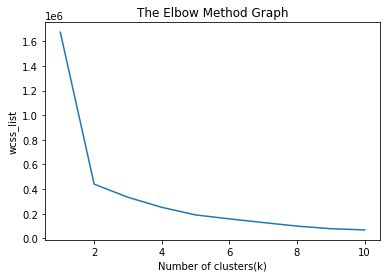

In [9]:
#finding optimal number of clusters using the elbow method 
from sklearn.cluster import KMeans
wcss_list = []  #for values of WCSS

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
    
mtp.plot(range(1,11),wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel("Number of clusters(k)")
mtp.ylabel("wcss_list")
mtp.show()

In [10]:
wcss_list

[1673624.5000000007,
 440146.70193894394,
 333284.1942531517,
 251784.26317424315,
 189924.58972877782,
 157946.40534747712,
 128103.86974124279,
 99238.24807042134,
 78123.16798641863,
 68268.79713978156]

In [11]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters = 2, init='k-means++',random_state = 42)
y_predict = kmeans.fit_predict(x)

In [12]:
    y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

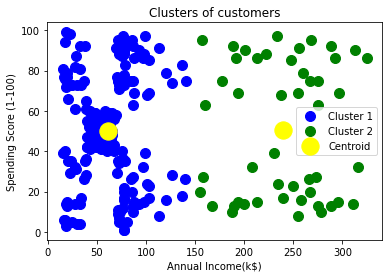

In [16]:
#visualizing the clusters
mtp.scatter(x[y_predict == 0,0], x[y_predict == 0,1], s = 100, c= 'blue', label = 'Cluster 1')
mtp.scatter(x[y_predict == 1,0], x[y_predict == 1,1], s= 100, c = 'green', label = 'Cluster 2')
mtp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 300, c = 'yellow' , label = 'Centroid')  
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income(k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()

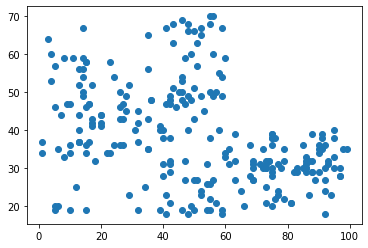

In [22]:
mtp.scatter(dataset['Spending Score (1-100)'],dataset['Age'])